In [70]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
with open('data/district.json', 'r') as file:
    data = json.loads(file.read())

questions for eddie & pradnya
- short overview of different tests? or could you tell us state that the district is in so we can look at the tests?
- scores_df: are subgroups right (all same gender and same ethnicity)? key for one-hot encoding?
- 

# data exploration

In [11]:
data.keys()

dict_keys(['benchmarks', 'schools', 'courseSections', 'courseSectionRosters', 'scores'])

In [48]:
benchmarks_df = pd.DataFrame(data['benchmarks'])
schools_df = pd.DataFrame(data['schools'])
courseSections_df = pd.DataFrame(data['courseSections'])
courseSectionRosters_df = pd.DataFrame(data['courseSectionRosters'])
scores_df = pd.DataFrame(data['scores'])

## benchmarks

In [49]:
print("benchmarks_df")
print(benchmarks_df.shape)
print(benchmarks_df.columns)

benchmarks_df
(42, 6)
Index(['id', 'districtId', 'year', 'level', 'dataSource', 'value'], dtype='object')


In [59]:
benchmarks_df['year'] = pd.to_numeric(benchmarks_df['year'], errors='coerce').astype('int64')
benchmarks_df['level'] = pd.to_numeric(benchmarks_df['level'], errors='coerce').astype('int64')
benchmarks_df['value'] = pd.to_numeric(benchmarks_df['value'], errors='coerce').astype('float64')

print(benchmarks_df.dtypes)

id             object
districtId     object
year            int64
level           int64
dataSource     object
value         float64
dtype: object


In [60]:
benchmarks_df

,id,districtId,year,level,dataSource,value
0,120,45,2017,3,value_scantronMath,2356.0
1,121,45,2017,3,value_scantronReading,2563.0
2,122,45,2017,4,value_scantronMath,2493.0
3,123,45,2017,4,value_scantronReading,2674.0
4,124,45,2017,5,value_scantronMath,2584.0
5,125,45,2017,5,value_scantronReading,2841.0
6,126,45,2017,6,value_scantronMath,2675.0
7,127,45,2017,6,value_scantronReading,2897.0
8,128,45,2017,7,value_scantronMath,2766.0
9,129,45,2017,7,value_scantronReading,3008.0


In [73]:
# removing data that doesn't exist for both 2017 and 2018 (can't compare)
scores_df_2017 = benchmarks_df[benchmarks_df['year'] == 2017]
level_source_combinations = scores_df_2017[['level', 'dataSource']].drop_duplicates()
scores_df_2018 = benchmarks_df.merge(level_source_combinations, on=['level', 'dataSource'])
scores_df_2018 = scores_df_2018[scores_df_2018['year'] == 2018]
scores_df_pairs = pd.concat([scores_df_2017, scores_df_2018])
scores_df_pairs = scores_df_pairs.sort_values(['level', 'dataSource', 'year'])

# filtering out ACT composite bc it's on a different scale
scores_df_pairs = scores_df_pairs[scores_df_pairs['dataSource'] != 'value_actCompositeScore']
scores_df_pairs


,id,districtId,year,level,dataSource,value
0,120,45,2017,3,value_scantronMath,2356.0
13,133,45,2018,3,value_scantronMath,2364.0
1,121,45,2017,3,value_scantronReading,2563.0
14,134,45,2018,3,value_scantronReading,2518.0
2,122,45,2017,4,value_scantronMath,2493.0
15,135,45,2018,4,value_scantronMath,2488.0
3,123,45,2017,4,value_scantronReading,2674.0
16,136,45,2018,4,value_scantronReading,2678.0
4,124,45,2017,5,value_scantronMath,2584.0
17,137,45,2018,5,value_scantronMath,2589.0


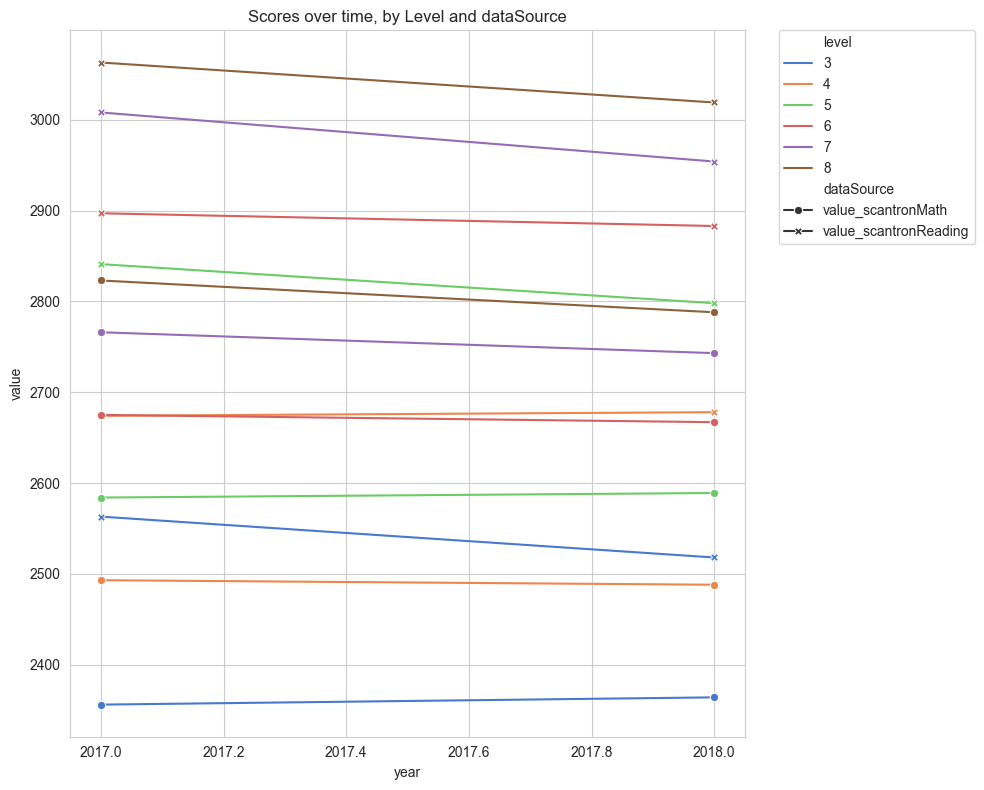

In [86]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='year', y='value', hue='level', style='dataSource', data=scores_df_pairs, markers=True, dashes=False, palette = 'muted')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Scores over time, by Level and dataSource")
plt.tight_layout()
plt.show()

## schools

In [22]:
print("schools_df")
print(schools_df.shape)
print(schools_df.columns)

schools_df
(20, 8)
Index(['id', 'name', 'districtId', 'costCenter', 'abbreviation',
       'acqRequestSelectable', 'oneRoster_sourcedId', 'oneRoster_ticketId'],
      dtype='object')


In [23]:
schools_df

,id,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId
0,222,Elementary A,45,5,EES,1,,0
1,223,Middle School A,45,8,EMS,1,,0
2,224,High School A,45,10,ECHS,1,,0
3,225,Junior High B,45,12,ECJH,1,,0
4,226,Elementary School B,45,18,HES,1,,0
5,227,Middle School C,45,19,HMS,1,,0
6,228,High School B,45,20,HHS,1,,0
7,229,Middle School D,45,23,MJH,1,,0
8,230,Elementary School C,45,30,RSE,1,,0
9,231,Elementary School D,45,35,CES,1,,0


## courseSections

In [25]:
print("courseSections_df")
print(courseSections_df.shape)
print(courseSections_df.columns)

courseSections_df
(17662, 4)
Index(['id', 'vanityId', 'year', 'schoolId'], dtype='object')


In [26]:
courseSections_df.head()

,id,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222


## courseSectionRosters

In [27]:
print("courseSectionRosters_df")
print(courseSectionRosters_df.shape)
print(courseSectionRosters_df.columns)

courseSectionRosters_df
(612241, 5)
Index(['id', 'courseSectionId', 'studentId', 'studentLevel', 'ticket'], dtype='object')


In [28]:
courseSectionRosters_df.head()

,id,courseSectionId,studentId,studentLevel,ticket
0,1047696,39975,45333,4,
1,1047704,39975,56116,4,
2,1047706,39975,45345,4,
3,1047715,39975,45400,4,
4,1047729,39975,45413,4,


## scores

In [30]:
print('scores_df')
print(scores_df.shape)
print(scores_df.columns)

scores_df
(34317, 71)
Index(['id', 'ticket', 'studentId', 'studentLevel', 'year',
       'measurementTypeId', 'subgroup_specialEd', 'subgroup_lunchStatus',
       'subgroup_gender', 'subgroup_ethnicity', 'subgroup_ell',
       'subgroup_bottom25', 'value_actMathScore', 'value_actEnglishScore',
       'value_actReadingScore', 'value_actScienceScore',
       'value_actCompositeScore', 'value_nweaMath', 'value_nweaReading',
       'value_nweaEnglish', 'value_iReadyMath', 'value_iReadyReading',
       'value_actMasteryComposite', 'value_actMasteryReading',
       'value_actMasteryMath', 'value_actMasteryScience',
       'value_actMasteryEnglish', 'value_nweaELA', 'value_scantronMath',
       'value_scantronReading', 'value_mapMath', 'value_mapEnglish',
       'value_mapReading', 'value_mapRLA', 'value_scantronScience',
       'value_scantronLanguage', 'value_ReadingFoundations',
       'value_scantronAlgebra', 'value_eocMath', 'value_actELAScore',
       'value_mapScience', 'value_LeapELAS

In [33]:
pd.set_option('display.max_columns', None)
scores_df.head()

,id,ticket,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_nweaMath,value_nweaReading,value_nweaEnglish,value_iReadyMath,value_iReadyReading,value_actMasteryComposite,value_actMasteryReading,value_actMasteryMath,value_actMasteryScience,value_actMasteryEnglish,value_nweaELA,value_scantronMath,value_scantronReading,value_mapMath,value_mapEnglish,value_mapReading,value_mapRLA,value_scantronScience,value_scantronLanguage,value_ReadingFoundations,value_scantronAlgebra,value_eocMath,value_actELAScore,value_mapScience,value_LeapELAScale,value_LeapMathScale,value_LeapALScale,value_LeapE2Scale,value_LeapGmScale,value_LeapBlScale,value_LeapE3Scale,value_LeapUsScale,value_E1Scale,value_UsEsScale,value_accessReadingScale,value_accessReadingProficiency,value_accessCompositeScale,value_accesscompositeProficiency,value_dibelsReading,value_mapHistory,value_LEAPSocSci,value_scantronGeometry,value_MathMilestones,value_ELAMilestones,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,115316,1530793427me3n202dz2,44774,8,2017,4,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,2808,2936,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120482,1530793766nnbvcr456s,44774,8,2017,6,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,2841,2950,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,394052,1561150944dlvii7ak6r,44774,9,2018,6,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,115317,1530793427me3n202dz2,44775,8,2017,4,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,2580,2660,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,120483,1530793766nnbvcr456s,44775,8,2017,6,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,2705,2670,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
print(f"specialEd {scores_df['subgroup_specialEd'].nunique()}")
print(f"lunchStatus {scores_df['subgroup_lunchStatus'].nunique()}")
print(f"gender {scores_df['subgroup_gender'].nunique()}")
print(f"ethnicity {scores_df['subgroup_ethnicity'].nunique()}")
print(f"ell {scores_df['subgroup_ell'].nunique()}")
print(f"bottom25 {scores_df['subgroup_bottom25'].nunique()}")


specialEd 2
lunchStatus 2
gender 1
ethnicity 1
ell 1
bottom25 2
